# 02_data_preparation.ipynb

**Project:** ds-air-pollution-prediction  
**Author:** Iris Winkler, Carlos Duque, Johannes Gooth  
**Date:** April 29, 2024

---

## 📘 Introduction

In this notebook, we will focus on the data cleaning and preprocessing phase of our analysis for the ds-air-pollution-prediction project. After successfully downloading and compiling the necessary dataset from Zindi, the primary objective here is to prepare the data for analysis by addressing any issues related to data quality and transforming the data into a suitable format for modeling.

The dataset we are working with contains detailed information on various air pollution metrics, including concentrations of different pollutants, meteorological data, and other relevant environmental factors. This dataset was acquired from the Zindi platform, which hosts data science competitions and challenges aimed at solving real-world problems. We have downloaded the data as a CSV file. Now, we will proceed to clean and preprocess this data to ensure it is ready for further analysis.

### Key Steps:
1. **Data Loading:** We will begin by loading the dataset from the CSV file into a pandas DataFrame for further processing.

2. **Data Inspection:** This step will involve identifying the shape of the DataFrame, data types, missing values, and any initial anomalies or inconsistencies within the data.

3. **Data Cleaning:** Here, we will handle missing values, correct data types, remove duplicates, and resolve any inconsistencies to enhance data quality.

4. **Feature Engineering:** We will perform necessary transformations, such as normalizing data and creating new features that may be beneficial for modeling.

5. **Final Dataset Preparation:** After completing the data cleaning and transformation processes, we will finalize the dataset to ensure it is well-organized and ready for subsequent explorative data analysis phases in the upcoming notebook. We will also perform a train-test split on the original dataset, thereby segregating the data into training and testing subsets. This separation is crucial for developing robust models and ensuring unbiased evaluation during the modeling phase.


### Expected Outcome:
- **Clean and Structured Dataset**: A meticulously prepared dataset that is optimized for exploratory data analysis (EDA), ensuring that all necessary preprocessing steps have been accurately applied.
- **Train/Test Splits Ready for Modeling**: Clearly defined training and testing subsets derived from the original dataset, poised for use in the model development and evaluation stages of the project.

---

## ⚙️ Setting-Up the Working Environment

In [92]:
# Avoid restarting Kernel 
%load_ext autoreload
%autoreload 2

import sys
# setting path
sys.path.append('../')

import os

# Import of relevant packages
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from src.preprocessing.processing_functions import * 
from src.preprocessing.validation_functions import * 
from src.visualization.visualization_functions import *

from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---

## 📥 Loading the Data

In [93]:
# Load the data into a Pandas DataFrame
df = pd.read_csv('../data/air_pollution_data.csv')

---

## 🔍 Data Inspection

In this section, we will conduct a thorough inspection of the dataset to ensure its quality and suitability for analysis. This involves examining the structure of the data, identifying any anomalies such as missing or inconsistent values, and gaining an initial understanding of the key variables. The insights gained during this inspection will guide the subsequent data cleaning and preprocessing steps, ensuring that our analysis is based on reliable and accurate data.

In [94]:
# Display first 5 rows of the dataset
df.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-10-25,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-02,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-03,13,NaN,NaN,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,id_9aandqzy4n,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-08,14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
4,id_ali5x2m4iw,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-09,13,0.000267,0.774656,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731


In [95]:
# Display last 5 rows of the dataset
df.tail()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
8066,id_ov6ddbfdf0,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-17,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.086071
8067,id_3tv6i1a09t,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-24,11,-0.000563,0.595788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.110000
8068,id_csqjqt3f9i,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-25,11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.080000
8069,id_tv6dzkz7ii,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-26,10,-0.000188,0.746123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.026750
8070,id_qgxtderh4p,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-27,10,0.000089,0.752415,...,3458.536865,76573.898438,2458.536865,4.868147,0.18731,73.323975,48.218334,-144.96904,21.264854,13.103000


### Shape of the Dataset
In this section, we will inspect the shape of the dataset, which refers to the number of rows and columns it contains. Understanding the dataset’s shape gives us an initial sense of its size and structure, helping us to plan the subsequent steps in our analysis. This overview will also allow us to quickly verify that the dataset was loaded correctly and completely.

In [96]:
# Shape of the dataset (length and width)
df.shape

(8071, 80)

There are 8071 rows and 80 columns in the dataset.

### Column Names and Descriptions for the Dataset
In this section, we will review the column names and their corresponding descriptions in the dataset. Understanding what each column represents is essential for correctly interpreting the data and ensuring that our analysis is accurate. We will verify that the column names are clear and consistent, and where necessary, provide or refine descriptions to enhance clarity.

Next, we will check the column names of our DataFrames:

In [97]:
# Columns in the dataframe
df.columns

Index(['id', 'site_id', 'site_latitude', 'site_longitude', 'city', 'country',
       'date', 'hour', 'sulphurdioxide_so2_column_number_density',
       'sulphurdioxide_so2_column_number_density_amf',
       'sulphurdioxide_so2_slant_column_number_density',
       'sulphurdioxide_cloud_fraction', 'sulphurdioxide_sensor_azimuth_angle',
       'sulphurdioxide_sensor_zenith_angle',
       'sulphurdioxide_solar_azimuth_angle',
       'sulphurdioxide_solar_zenith_angle',
       'sulphurdioxide_so2_column_number_density_15km', 'month',
       'carbonmonoxide_co_column_number_density',
       'carbonmonoxide_h2o_column_number_density',
       'carbonmonoxide_cloud_height', 'carbonmonoxide_sensor_altitude',
       'carbonmonoxide_sensor_azimuth_angle',
       'carbonmonoxide_sensor_zenith_angle',
       'carbonmonoxide_solar_azimuth_angle',
       'carbonmonoxide_solar_zenith_angle',
       'nitrogendioxide_no2_column_number_density',
       'nitrogendioxide_tropospheric_no2_column_number_densi

All column names are in lowercase and utilize underscores (`_`) instead of spaces, adhering to Python's naming conventions.  
For more detailed information about the column names, please refer to the [Sentinel 5P Dataset Documentation](https://developers.google.com/earth-engine/datasets/catalog/sentinel-5p).  

We have identified four columns—`'id'` and `'site_id'`—that are candidates for removal. Dropping these columns is justified based on the following reasons:

1. **`id`**
    - **Unique Identifier:**  
      The `'id'` column serves as a unique identifier for each record in the dataset. While unique identifiers are essential for data management and tracking, they do not provide any predictive value for our model.
      
    - **No Informative Value:**  
      Since each `'id'` is unique, it does not contribute to distinguishing patterns or relationships within the data that are relevant to predicting PM2.5 concentrations.
      
    - **Risk of Overfitting:**  
      Including unique identifiers can inadvertently lead the model to memorize these values, resulting in poor generalization to unseen data.

2. **`site_id`**
    - **Redundancy with `'id'`:**  
      Similar to the `'id'` column, `'site_id'` likely represents a unique identifier for specific sensor sites. If `'site_id'` is unique for each record, it shares the same drawbacks as the `'id'` column.
      
    - **Limited Predictive Power:**  
      Unless `'site_id'` encodes meaningful spatial or categorical information that correlates with PM2.5 levels, it does not enhance the model's predictive capabilities.
      
    - **Simplification:**  
      Removing `'site_id'` helps in simplifying the dataset, reducing dimensionality without sacrificing relevant information.

#### Summary of Reasons to Drop the Columns:

| Column    | Reason for Dropping                                                                                                                                      |
|-----------|----------------------------------------------------------------------------------------------------------------------------------------------------------|
| **`id`**       | Unique identifier with no predictive value, risk of overfitting.                                                                                   |
| **`site_id`**  | Redundant with `'id'`, limited predictive power, simplifies the dataset.                                                                          |

#### Implications for Modeling:

- **Enhanced Model Performance:**  
  By removing non-informative and redundant features, we reduce noise in the dataset, enabling the model to focus on relevant predictors that directly influence PM2.5 concentrations.
  
- **Improved Generalization:**  
  Eliminating unique identifiers minimizes the risk of overfitting, thereby enhancing the model's ability to generalize to new, unseen data.
  
- **Increased Computational Efficiency:**  
  A streamlined dataset with fewer irrelevant features reduces computational complexity, leading to faster training times and more efficient resource utilization.

Next, we will examine the different data types present in our datasets:

### Datatypes in the Dataset
In this section, we will examine the datatypes of the columns in the dataset. Understanding the datatypes is crucial because they determine how the data can be manipulated and analyzed. We will verify that each column's datatype is appropriate for the kind of data it holds, and make any necessary adjustments to ensure consistency and accuracy in our analysis.

In [98]:
# Checking for the data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 80 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id                                                        8071 non-null   object 
 1   site_id                                                   8071 non-null   object 
 2   site_latitude                                             8071 non-null   float64
 3   site_longitude                                            8071 non-null   float64
 4   city                                                      8071 non-null   object 
 5   country                                                   8071 non-null   object 
 6   date                                                      8071 non-null   object 
 7   hour                                                      8071 non-null   int64  
 8   sulphurdioxide_so2

| Data Type | Description |
|:---------|:------------|
| *object*  | The dataset contains **5 features** with an object data type. |
| *int64*   | There is **1 feature** with an integer data type. |
| *float64* | The remaining **74 features** have a float data type. Rounding will be addressed in a subsequent step. |

Next, we will examine the dataset for missing values.

Out of the five features with an object data type, two will be removed due to their lack of predictive value or redundancy. 

One of the remaining features, `'date'`, represents the date when the measurements were taken. To facilitate temporal analysis and enable effective feature engineering, we will convert the `'date'` column to a datetime format. 

The other two features of object type are 'city' and 'country', representing the location where the measurements were taken. To use these categorical variables in our regression models, we will apply one-hot encoding to transform them into numerical format.

One of the key factors influencing PM2.5 concentrations is temporal variability. Extracting date components from the `'date'` column allows us to capture and analyze these temporal patterns, enhancing the predictive capabilities of our models. Here's why extracting date components is essential and the types of cycles that PM2.5 levels may exhibit:

**1. Identifying Daily Patterns**

- **Rush Hour Traffic:**
  PM2.5 levels often spike during morning and evening rush hours due to increased vehicular emissions. By extracting the **day of the week**, we can identify these peak pollution times and account for them in our models.

- **Industrial Operations:**
  Certain industries operate on fixed schedules, leading to predictable fluctuations in emissions throughout the week. Understanding the **day of the week** helps in correlating industrial activity with PM2.5 concentrations.

**2. Distinguishing Weekday vs. Weekend Emissions**

- **Traffic Variations:**
  Traffic patterns can significantly differ between weekdays and weekends. Typically, weekends may experience reduced traffic, leading to lower PM2.5 levels. Extracting the **day of the week** allows the model to differentiate between these variations.

- **Public Events and Activities:**
  Special events, gatherings, or construction activities that occur on specific days can influence air quality. Recognizing these patterns through the **day of the week** feature can improve the model's ability to account for atypical pollution events.

**3. Enhancing Model Performance with Temporal Features**

By extracting and incorporating date components into the dataset, we provide the model with valuable temporal context that can:

- **Improve Predictive Accuracy:**
  Temporal features like **day of the week** help the model recognize and learn from patterns associated with different days, enhancing its ability to make accurate predictions.

- **Enable Seasonal and Trend Analysis:**
  Although our current function extracts only the **day** and **day of the week**, having these temporal features allows for the identification of recurring daily and weekly effects, leading to more robust and generalizable predictions.

- **Facilitate Feature Engineering:**
  Date components enable the creation of derived features, such as **lag variables** (e.g., PM2.5 levels from previous days) or **rolling averages**, which can capture dependencies over time.

Extracting date components is a fundamental step in the data preprocessing pipeline for predicting PM2.5 concentrations. By capturing daily and weekly temporal patterns, we equip our predictive models with the necessary information to understand and anticipate fluctuations in air quality. This temporal insight not only enhances the accuracy and reliability of predictions but also provides actionable intelligence for stakeholders aiming to mitigate the adverse effects of air pollution.


### Checking for Missing Values
In this section, we will identify and analyze any missing values in the dataset. Missing data can lead to biased results or reduce the effectiveness of our analysis, so it is essential to understand the extent and pattern of missingness. We will explore the missing values, determine their potential impact, and decide on appropriate strategies for handling them, such as imputation or removal.

In [99]:
# Checking for missing values ('NaN'/'None')
df.isnull().sum()

id                               0
site_id                          0
site_latitude                    0
site_longitude                   0
city                             0
                              ... 
cloud_sensor_azimuth_angle    3077
cloud_sensor_zenith_angle     3077
cloud_solar_azimuth_angle     3077
cloud_solar_zenith_angle      3077
pm2_5                            0
Length: 80, dtype: int64

<Axes: >

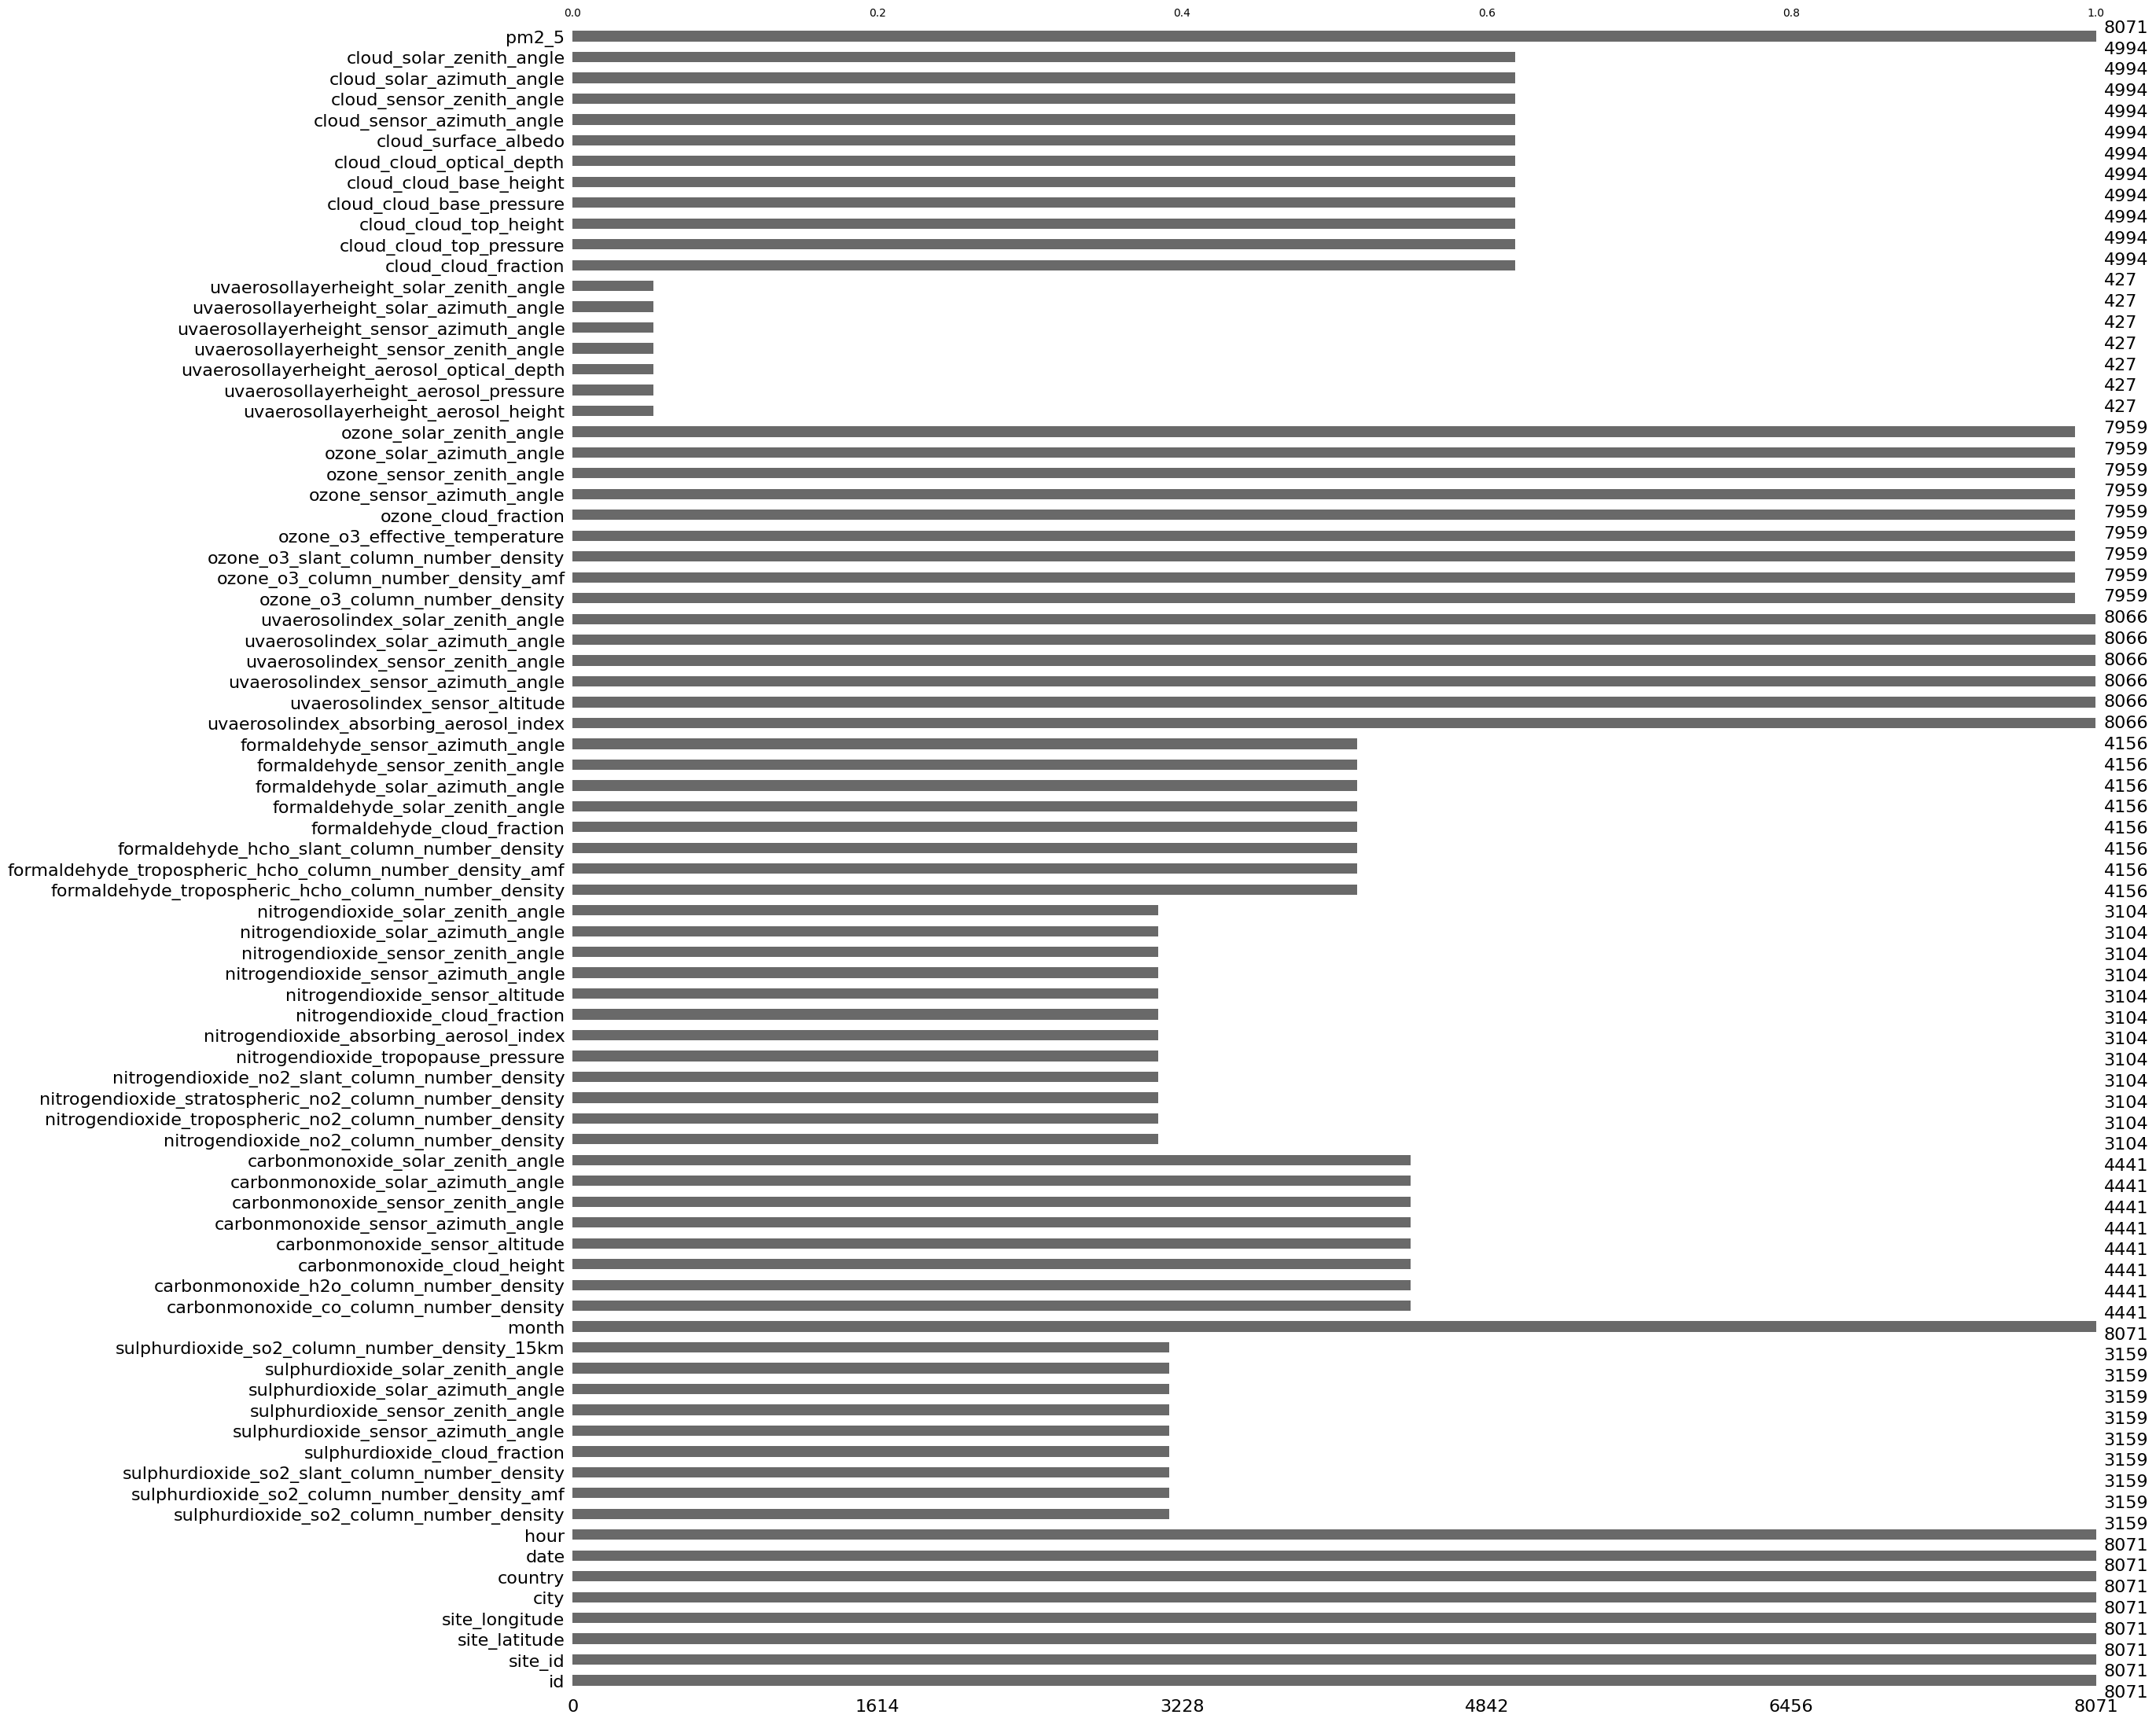

In [100]:
# Plotting percentage of missing values per column
msno.bar(df)

<Axes: >

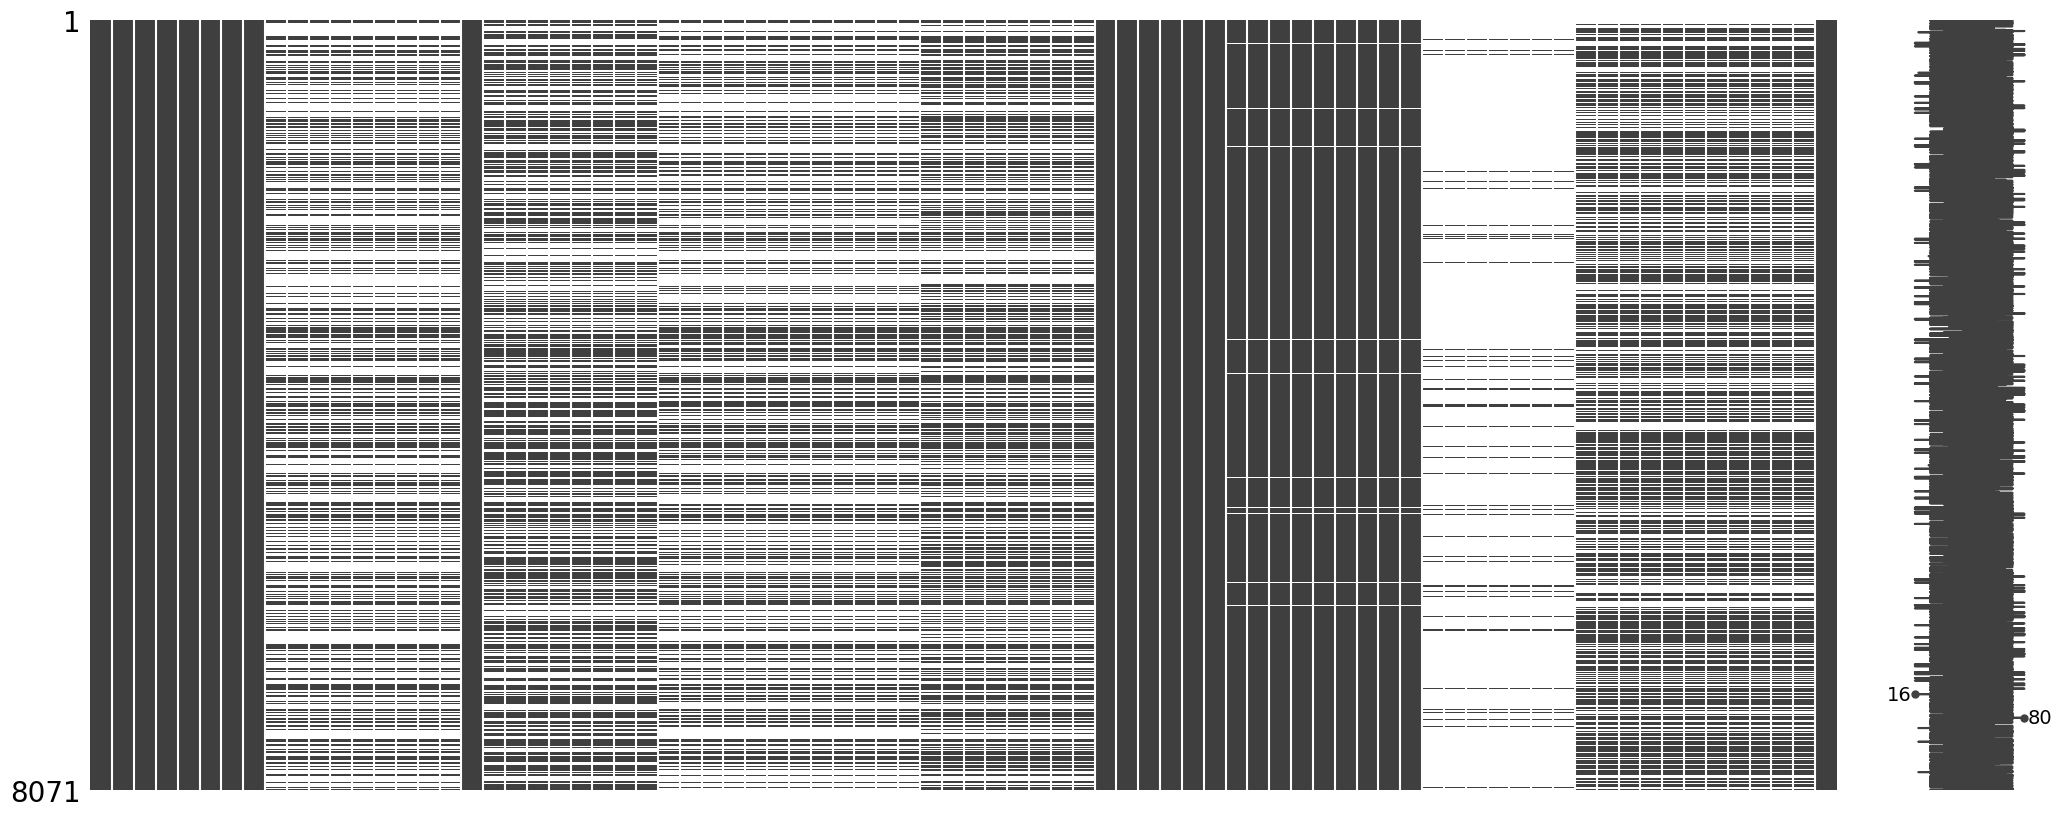

In [101]:
# Plotting the matrix of missing values
msno.matrix(df)

While there are a few instances of missing values occurring together within specific sections of the rows, there is no clear pattern in their distribution across the dataset. Consequently, the missing data appears to be randomly distributed.

#### Interpretation Based on Data Sources

This randomness in missing data can be attributed to the nature of the data sources integrated into the dataset:

1. **Ground-Based Air Quality Sensors:**
   - **Missing Sensor Readings:** Some cities may lack sensor data for certain days due to sensor malfunctions, maintenance, or logistical issues. Notably, the co-occurrence of missing values within specific sections of the rows is attributed to data stemming from a single sensor. This means that when one sensor fails or is inactive, all related measurements from that sensor for that particular day and location are missing, leading to entire rows being excluded from the dataset for those specific instances.

2. **Global Forecast System (GFS) Weather Data:**
   - **Consistent Coverage:** Weather data from GFS is generally comprehensive; however, there might be occasional gaps due to data transmission issues or updates in the forecasting model. These gaps are sporadic and do not follow a predictable pattern.

3. **Sentinel 5P Satellite Data:**
   - **Incomplete Pollutant Measurements:** Notably, there are gaps in the satellite data for certain pollutants, particularly CH₄. Satellite data acquisition can be affected by factors such as cloud cover, satellite orbit limitations, or data processing delays. These interruptions are random and vary across different regions and times.

#### Considerations for Data Preprocessing

The random distribution of missing values suggests that the data is **Missing Completely at Random (MCAR)**. This implies that the likelihood of a value being missing is unrelated to any other observed or unobserved data. Consequently, standard imputation techniques, such as mean or median imputation, can be effectively applied without introducing significant bias. Additionally, since the missingness does not follow a systematic pattern, it is less likely to adversely affect the model's ability to learn from the data.

However, data imputation is a critical step in handling missing values, as improper imputation can introduce bias or distort the data distribution. Therefore, we will also keep the option to simply delete all rows with missing data if imputation is not feasible or appropriate. This dual approach ensures that we maintain the integrity of our dataset while exploring the most suitable methods for addressing missing values.

By understanding the origins and nature of the missing data, we can implement appropriate strategies to handle these gaps, ensuring that our predictive model for **PM2.5 particulate matter** concentrations remains robust and reliable.

### Domain Knowledge
After conducting an extensive review of the scientific literature, we carefully deliberated on whether to retain or remove columns with missing values. In the following section, we outline our chosen approach.

1. ***Sulfur dioxide (SO2)*** is closely related to PM2.5. SO2 is a significant precursor to sulfate aerosols, which are a major component of fine particulate matter (PM2.5) in the atmosphere. Here's how the relationship works:

    Chemical Transformations: When SO2 is emitted into the atmosphere, it can undergo various chemical reactions, particularly with hydroxyl radicals. This transformation leads to the formation of sulfuric acid (H2SO4), which can further react or nucleate to form sulfate particles.
    Secondary Particulate Formation: These sulfate particles contribute to secondary particulate matter, significantly influencing the concentration of PM2.5. This process is especially relevant in urban areas and regions with high fossil fuel combustion rates, where SO2 emissions are substantial.
    Environmental and Health Impact: The sulfate component of PM2.5 is known for its ability to degrade air quality and cause health problems, including respiratory and cardiovascular issues.
    Regulation and Control: Due to its role in forming PM2.5, controlling SO2 emissions is a critical strategy for reducing overall particulate matter levels and improving air quality.
    Understanding the link between SO2 and PM2.5 is crucial for environmental policy and implementing effective air quality management strategies​ (MDPI)​.

    -> keep columns

2. ***Aerosols*** are closely related to PM2.5. In the context of air pollution, "aerosol" refers to the suspension of fine solid particles or liquid droplets in air or another gas. These can include a wide range of particles, such as dust, pollen, soot, smoke, and liquid droplets, which are small enough to be suspended in the atmosphere.

    PM2.5 specifically refers to particulate matter that has a diameter of less than 2.5 micrometers. These fine particles are a subset of aerosols and are significant from both environmental and health perspectives because they can penetrate deep into the lungs and even enter the bloodstream, causing various health issues.

    Aerosols can be generated from both natural sources, such as volcanic eruptions and forest fires, and human-made sources, such as vehicle emissions and industrial processes. The study and management of aerosols, particularly PM2.5, are crucial for air quality monitoring and public health protection.

    -> keep columns

3. ***Cloud characteristics*** such as cloud fraction, height, pressure at the base and top, optical depth, and surface albedo can influence PM2.5 levels, although often indirectly. Here’s how these factors might play a role:

    1. **Cloud Fraction and Optical Depth**: These determine the amount of sunlight that reaches the Earth's surface, which can affect photochemical reactions in the atmosphere. These reactions are crucial for the formation of secondary pollutants that contribute to PM2.5. For instance, lower sunlight due to high cloud cover can reduce the rate of photochemical smog formation, potentially lowering PM2.5 levels.

    2. **Cloud Height and Pressure**: The height and pressure of clouds can influence atmospheric circulation and weather patterns, which in turn affect air pollution dispersion. Higher clouds and different pressure levels can lead to changes in wind patterns, possibly dispersing or concentrating pollutants like PM2.5.

    3. **Surface Albedo**: This refers to the Earth's surface ability to reflect sunlight. Surfaces with high albedo (like those covered with snow or light-colored materials) reflect more solar radiation, which can reduce ground-level temperatures and affect thermal circulations. These changes can impact how pollutants are mixed and dispersed in the lower atmosphere.

    4. **Clouds and Precipitation**: Clouds are also related to precipitation processes. Precipitation can remove pollutants from the atmosphere, a process known as wet deposition. When particulate matter like PM2.5 is washed out of the atmosphere by rain or snow, it leads to temporary improvements in air quality.

    In summary, while clouds don't directly emit or absorb PM2.5, their presence and characteristics can significantly alter meteorological conditions, thereby influencing the levels and distribution of particulate matter indirectly through changes in sunlight exposure, weather patterns, and precipitation.

    -> keep columns

4. ***Formaldehyde (HCHO)*** is related to PM2.5 primarily through secondary formation processes in the atmosphere. Formaldehyde is a volatile organic compound (VOC) that can act as a precursor to secondary organic aerosols (SOAs), which are a component of PM2.5. Here’s how this relationship works:

    1. **Chemical Reactions**: Formaldehyde in the atmosphere can undergo photochemical reactions driven by sunlight. These reactions can produce radicals and other compounds that further react to form secondary organic aerosols.

    2. **Contribution to PM2.5**: The SOAs formed from formaldehyde and other VOCs contribute to the overall mass of PM2.5 in the atmosphere. These aerosols can be significant, especially in urban and industrial areas with high levels of VOC emissions.

    3. **Air Quality Impact**: Because formaldehyde is involved in the formation of particulate matter, controlling VOC emissions (including formaldehyde) is important for managing PM2.5 levels and improving air quality.

    The link between HCHO and PM2.5 underscores the complexity of air pollution chemistry and the importance of monitoring a wide range of pollutants to effectively manage and mitigate air quality issues.

    -> keep columns

5. ***Carbon monoxide (CO)*** is not a direct component of PM2.5, but it is often correlated with PM2.5 concentrations in the atmosphere, primarily due to shared sources. Here’s how CO is related to PM2.5:

    1. **Common Sources**: Both CO and PM2.5 are often emitted from the same sources, such as motor vehicles, biomass burning, and industrial processes. This commonality means that areas with high CO levels often also have high PM2.5 levels due to simultaneous emissions of various pollutants.

    2. **Indicator of Combustion Efficiency**: CO is a product of incomplete combustion. High levels of CO can indicate poor combustion efficiency, which is also likely to produce higher amounts of particulate matter, including PM2.5. For example, inefficient fuel burning in engines or heaters can release both CO and a variety of particulate pollutants.

    3. **Atmospheric Chemistry**: While CO does not directly form PM2.5, it participates in atmospheric chemical reactions that can influence the levels of other pollutants that do form PM2.5. For instance, CO can react in the atmosphere to form secondary pollutants that contribute to the overall particulate load.

    4. **Air Quality Management**: Because of the correlation between the sources of CO and PM2.5, measures to reduce CO emissions (such as improving fuel combustion efficiency or upgrading vehicle emission standards) can also lead to reductions in PM2.5 concentrations.

    Thus, while CO is not a direct precursor or component of PM2.5, its presence is associated with conditions that can lead to increased levels of particulate matter. Monitoring CO levels can help in assessing combustion-related pollution and formulating strategies to control overall air pollution, including PM2.5.

    -> keep columns

6. ***Ozone (O3)*** is not directly a component of PM2.5, but it is related to particulate matter formation through atmospheric chemistry interactions. Here’s how ozone is connected to PM2.5:

    1. **Secondary Organic Aerosols (SOAs)**: Ozone plays a crucial role in the formation of secondary organic aerosols. Ozone can react with volatile organic compounds (VOCs) emitted from sources such as vehicles, industrial processes, and vegetation. These reactions often occur in the presence of sunlight and lead to the formation of new particulate matter, contributing to PM2.5 levels.

    2. **Photochemical Smog**: Ozone is a major component of photochemical smog, which includes a mixture of air pollutants including particulate matter. The same conditions that favor the formation of ozone (such as sunny, warm days) also promote the formation of PM2.5 from precursor gases like VOCs and nitrogen oxides (NOx).

    3. **Oxidizing Capacity**: Ozone has strong oxidizing properties, which can transform primary emissions into more reactive species that can then nucleate or condense to form particulate matter. This process can transform less harmful emissions into particles small enough to be classified as PM2.5.

    4. **Indicator of Air Quality**: Elevated levels of ozone and PM2.5 often occur together under certain meteorological conditions, particularly in urban environments. Thus, high ozone days can often also be high PM2.5 days, especially during periods of stagnant air that prevent the dispersion of pollutants.

    In summary, while ozone itself does not make up PM2.5, it influences the atmospheric processes that lead to the formation of PM2.5. Managing ozone levels, especially in urban areas, is therefore important not only for controlling ozone itself but also for managing levels of fine particulate matter.

    -> keep columns

7. ***Nitrogen dioxide (NO2)*** is related to PM2.5, primarily through its role in the formation of secondary particulate matter. Here’s how NO2 contributes to PM2.5 levels:

    1. **Formation of Nitrate Aerosols**: NO2 reacts with atmospheric compounds to form nitrate aerosols, which are a significant component of PM2.5. This reaction typically occurs with ammonia (NH3) to produce particulate nitrates, which increase the concentration of fine particulate matter in the atmosphere.

    2. **Photochemical Reactions**: NO2 plays a crucial role in photochemical reactions that produce ozone and other photochemical oxidants. These oxidants can further react with volatile organic compounds (VOCs) and other precursors to form secondary organic aerosols (SOAs), contributing to PM2.5 levels.

    3. **Urban Air Pollution**: In urban environments, where NO2 emissions are high due to traffic and industrial activities, the contribution of NO2 to PM2.5 formation is particularly significant. The density of emission sources accelerates the formation of both nitrate aerosols and SOAs.

    4. **Indicator of Combustion Sources**: Similar to carbon monoxide (CO), NO2 is often emitted from combustion sources such as vehicles and power plants. High levels of NO2 can indicate significant combustion-related pollution, which often corresponds with increased PM2.5 from various combustion byproducts.

    Managing NO2 emissions is important for controlling PM2.5 levels, especially in urban areas where exposure to NO2 and fine particulates can pose significant health risks. Reducing NO2 emissions from vehicles and industrial sources is crucial for improving air quality and reducing particulate matter pollution.

    -> keep columns

8. ***The angles*** in the features refer to geographical and/or directional measurements related to the data, such as the angles of wind direction, satellite data acquisition angles, or other related metrics. Angles can be important in air quality modeling if they relate to how pollutants disperse or how satellite observations are made relative to the Earth's surface.

    For example, wind direction, which could be represented by angles, is crucial for understanding how air pollutants travel and disperse across different areas. Similarly, satellite observation angles might affect the accuracy and relevance of the measurements for specific locations, especially in complex urban geometries where building shadows or reflections might influence sensor readings.

    -> keep columns

#### Conclusion

Based on our thorough scientific analysis, most columns appear to be relevant for our study. Therefore, we have chosen to retain all columns, despite the presence of missing values, and will apply imputation techniques to handle them. However, due to the limited data available for the ‘uvaerosollayerheight’ sensor, we will remove the corresponding column regardless.

Next, we will examine the dataset for any zero values.

### Checking for Zero Values

Zero values are permissible in specific features, including those with 'angles' in their names, as well as 'cloud_fraction' and 'weekday'. However, in all other features, the presence of zero values may indicate potential errors or anomalies in the data.

To concentrate our analysis on columns where zero values might signify an error, we initially exclude any columns that contain the word 'angle' in their headers:


In [102]:
# Create a new DataFrame without columns containing the word 'angle' and 'cloud_fraction'
df_filtered_noangle_nocloud = df[[col for col in df.columns if 'angle' not in col and 'cloud_fraction' and 'weekday' not in col]]

print(df_filtered_noangle_nocloud)

                 id                   site_id  site_latitude  site_longitude   
0     id_vjcx08sz91  6531a46a89b3300013914a36       6.532570        3.399360  \
1     id_bkg215syli  6531a46a89b3300013914a36       6.532570        3.399360   
2     id_oui2pot3qd  6531a46a89b3300013914a36       6.532570        3.399360   
3     id_9aandqzy4n  6531a46a89b3300013914a36       6.532570        3.399360   
4     id_ali5x2m4iw  6531a46a89b3300013914a36       6.532570        3.399360   
...             ...                       ...            ...             ...   
8066  id_ov6ddbfdf0  647f3a5d69df500029a2fc93      -1.268877       36.819139   
8067  id_3tv6i1a09t  647f3a5d69df500029a2fc93      -1.268877       36.819139   
8068  id_csqjqt3f9i  647f3a5d69df500029a2fc93      -1.268877       36.819139   
8069  id_tv6dzkz7ii  647f3a5d69df500029a2fc93      -1.268877       36.819139   
8070  id_qgxtderh4p  647f3a5d69df500029a2fc93      -1.268877       36.819139   

         city  country        date  hou

Next, we will examine the remaining columns for zero values, which may indicate potential errors in the data.

In [103]:
# Create a copy to avoid the SettingWithCopyWarning
df_filtered_noangle_nocloud = df_filtered_noangle_nocloud.copy()

# Calculate the number of zeros in each row 
df_filtered_noangle_nocloud['zero_count'] = (df_filtered_noangle_nocloud == 0).sum(axis=1)

# Count the rows with 5 or more zeros
number_of_rows_with_error_zero_values = (df_filtered_noangle_nocloud['zero_count'] >= 5).sum()

print(f"There are {number_of_rows_with_error_zero_values} rows with 0-values that likely indicate errors.")

There are 0 rows with 0-values that likely indicate errors.


Next, we will check for duplicate rows in our data:

### Checking for Duplicate rows
In this section, we will identify and address any duplicate rows in the dataset. Duplicate rows can skew the results of our analysis by over-representing certain data points. We will check for duplicates, understand the reasons behind any repetitions, and determine the appropriate action, such as removing or consolidating these duplicates, to ensure the integrity of our dataset.

In [104]:
# check for duplicate rows in the id column
df.duplicated().value_counts()

False    8071
Name: count, dtype: int64

Upon thorough inspection, we found that there are **no duplicate rows** in the dataset. This ensures that each record is unique, eliminating the need for any further actions related to duplicate data removal.

### Checking for Outliers in the 'pm2_5' Column

Identifying and addressing outliers in the target variable is a crucial step in ensuring the accuracy and reliability of our predictive models. Outliers can distort the distribution of the target, leading to biased model training and suboptimal performance. In this section, we will analyze the distribution of the `'pm2_5'` column to detect any anomalous values and determine appropriate strategies to handle them effectively.



#### Boxplot 

To gain a deeper understanding of the spread and central tendencies of the 'target' column, we will create a boxplot. This will help us identify any outliers, the overall distribution, and any potential skewness in the data.

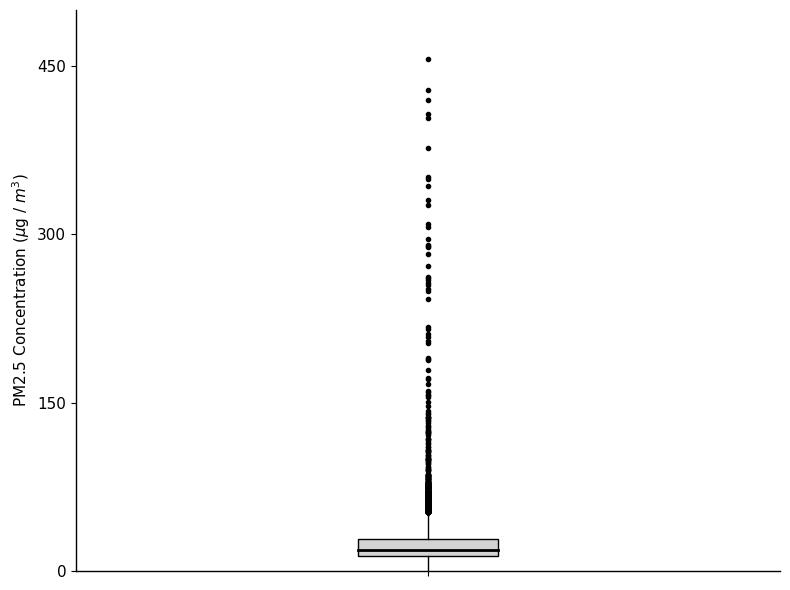

In [105]:
plot_box_plot(
    df=df, 
    value_col='pm2_5',  
    y_tick_intervals=(0, 500, 150),
    y_label='PM2.5 Concentration ($\mu$g / $m^3$)'
)

#### Violin Plot

To gain an even more comprehensive understanding of the distribution and density of our target variable, we will create a violin plot. This plot will help us uncover subtle distribution characteristics, detect multimodal distributions, and highlight any potential outliers or skewness within the data.

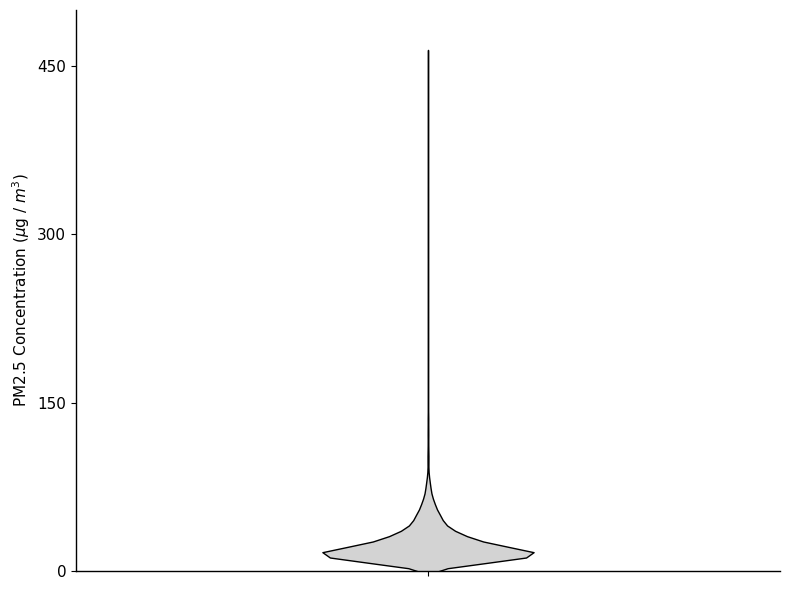

In [106]:
plot_violin_plot(
    df=df, 
    value_col='pm2_5',  
    y_tick_intervals=(0, 500, 150),
    y_label='PM2.5 Concentration ($\mu$g / $m^3$)'
)

#### Histogram

To better understand the distribution of the PM2.5 values, we will create a histogram. This histogram will allow us to observe the frequency of different values within the PM2.5 values, providing insights into their distribution patterns, potential outliers, and the overall spread of the data.

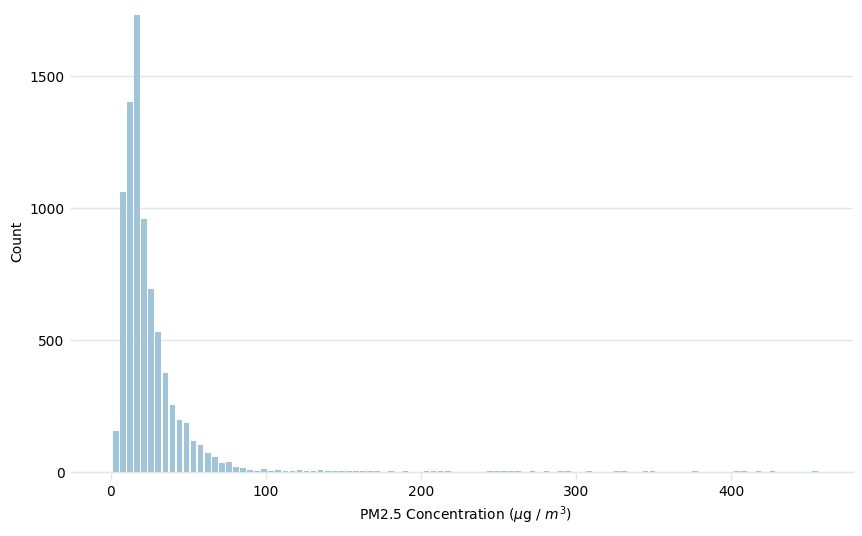

In [107]:
plot_histogram(
    df, 
    column='pm2_5', 
    bins=100, 
    y_tick_interval=(0, 1750, 500), 
    x_label='PM2.5 Concentration ($\mu$g / $m^3$)',
    color=colors[0],
    rwidth=0.8,
    transparent=True
)

Identifying outliers in the `'PM2.5'` target column is essential to ensure the robustness and accuracy of our predictive models. Outliers can distort the distribution of the target, leading to biased model training and suboptimal performance.  
As evident from the plots, the distribution of ‘PM2.5’ values is highly right-skewed. To systematically detect the outliers, we calculate an upper threshold for 'PM2.5' values of our data based on the **Interquartile Range (IQR) Method**. Below, we outline the calculations for determining this upper bound.


#### Detect Outliers with the Interquartile Range (IQR) Method

The Interquartile Range (IQR) measures the statistical spread between the first quartile (25th percentile) and the third quartile (75th percentile) of the data. This method identifies outliers as data points that lie significantly above or below this range.

Calculation Steps:

1.	Compute the First Quartile (Q1) and Third Quartile (Q3) of the ‘PM2.5’ Column:

	$Q1 = \text{25th percentile of } X$

	$Q3 = \text{75th percentile of } X$

2.	Calculate the IQR:

	$\text{IQR} = Q3 - Q1$

3.	Determine the Lower and Upper Bounds for Outliers:

	$\text{Upper Bound} = Q3 + 1.5 \times \text{IQR}$

4.	Identify Outliers:

	Data points with $X_i > \text{Upper Bound}$ are considered outliers.

In [108]:
detect_outliers_iqr(df, column='pm2_5')

Q1: 13.270600000000043
Q3: 28.838400000000043
IQR: 15.5678
Upper Bound: 52.190100000000044
Number of outliers detected using IQR: 520


52.190100000000044

---

## 🛠️ Data Cleaning 
In this section, we will focus on cleaning the dataset to ensure that it is accurate, consistent, and ready for analysis and modelling. Data cleaning involves addressing issues such as incorrect data types, outliers, and inconsistencies. By systematically cleaning the data, we enhance its quality and reliability, laying a solid foundation for meaningful analysis and insights.

### Droping Columns
As part of our data inspection, we have identified specific columns that do not contribute meaningful information to our predictive models. Columns such as `'id'`, `'site_id'`, `'city'`, and `'country'` were deemed irrelevant or redundant, either serving as unique identifiers with no predictive value or overlapping with other sensor-related features. Due to the limited data available for the ‘uvaerosollayerheight’ sensor, we will also remove the corresponding columns. Eliminating these non-contributory columns not only simplifies our dataset but also helps prevent potential confusion when subsequently splitting the data into training and testing sets for modeling purposes. This streamlined approach ensures that our focus remains on the most informative predictors, enhancing both the efficiency and accuracy of our modeling efforts.

In [109]:
# Remove the columns 'id' and 'site_id'
df_cleaned = drop_id(df)

Columns to be removed (2): ['id', 'site_id']
Removed 2 column(s). 78 column(s) remain.


In [110]:
# Remove the columns corrsponding to the 'uvaerosollayerheight’ sensor
df_cleaned = drop_uvaerosollayerheight_columns(df_cleaned)

Removed 7 column(s) containing 'uvaerosollayerheight'. 71 column(s) remain.


### Handling Outliers in 'pm2_5'
The Zindi challenge utilizes Root Mean Square Error (RMSE) as its evaluation metric, which we will adopt for our comparisons. Eliminating outliers (for example by using the Interquartile Range (IQR) method) in the target variable ‘pm2_5’ would constrain the data distribution, resulting in a different ground truth and making our solution incomparable to those submitted on Zindi. Therefore, we will retain all outliers while acknowledging that the distribution is highly right-skewed.


### Transforming Data-Types

As mentioned earlier, one column in the dataset has a data type that need to be transformed to better align with their content. This step is crucial for ensuring that the data is correctly interpreted and can be efficiently analyzed. We will convert this column to the appropriate data types to improve data processing and analysis. Specifically:

| Feature | Convert values to format |
|:-|:-|
| 'date' | datetime |

In [111]:
# Convert values of the into datetime format
df_cleaned = convert_date(df_cleaned)

Missing values in 'date' before conversion: 0
All dates in 'date' successfully converted to datetime format.


### Sorting the DataFrame by the 'date' Column
Sorting the DataFrame by the 'date' column arranges the data in chronological order, which is essential for accurate time-series analysis and ensures consistency in subsequent data processing steps.

In [112]:
# Sort the DataFrame by the 'date' column
df_cleaned = ordinal_encoding_dates(df_cleaned)

DataFrame sorted by 'date' in ascending order.



### Imputing Missing Values

In [113]:
df_cleaned = impute_missing_values(df_cleaned)

Number of missing values in numerical columns before imputation: 199057
Number of missing values in numerical columns after imputation: 0



/Users/hannes/Documents/coding/projects/neuefische/ds-zindi-air-pollution/.venv/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


---

### Verifying the Changes: Previewing the DataFrame

To verify that our previous modifications have been applied correctly, we will preview the first few rows of the DataFrame. This allows us to inspect the initial data and confirm that the changes have been implemented as expected.

In [114]:
# Check result
df_cleaned.head()

,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,0.363000,32.52900,Kampala,Uganda,2023-01-01,11.0,-0.000250,0.560163,-0.000139,0.125426,...,6097.077877,58446.849848,5100.851293,-4.295731,0.048538,75.431881,23.192230,-142.830678,29.749726,14.1603
1,0.347014,32.64936,Kampala,Uganda,2023-01-01,11.0,0.000060,0.612723,0.000037,0.020481,...,6090.136477,58492.734209,5102.250385,-11.239323,0.068371,75.506445,22.348299,-142.641932,29.795760,20.2458
2,0.292820,32.57132,Kampala,Uganda,2023-01-01,11.0,0.000255,0.614896,0.000157,0.085492,...,6095.047291,58469.801442,5101.095521,-12.706940,0.033849,75.458653,22.921089,-142.718368,29.735461,18.8872
3,0.332610,32.61005,Kampala,Uganda,2023-01-01,11.0,0.000364,0.614546,0.000224,0.063668,...,6091.478199,58501.315716,5101.684753,-8.104561,0.050552,75.483082,22.613284,-142.685837,29.773452,16.8077
4,0.344000,32.55300,Kampala,Uganda,2023-01-01,11.0,-0.000117,0.549985,-0.000063,0.139545,...,6097.002217,58444.767130,5100.894562,-4.960016,0.050401,75.438860,23.116817,-142.811296,29.749932,23.6272


---

## 🧮 Feature Engineering
In this section, we will focus on feature engineering, a crucial step in enhancing the dataset by creating new features or transforming existing ones to better capture the underlying patterns in the data. The goal of feature engineering is to increase the dataset’s relevance and improve its predictive power. This involves extracting date components and applying standard scaling to numerical variables, ensuring that these features are appropriately processed and effectively utilized by our predictive models.

### Extracting Date Components
Understanding the temporal aspects of your data is essential for capturing underlying patterns and trends that influence predictive models. In this section, we will extract various components from datetime features that enhance the dataset’s informativeness and improve model performance.

In [115]:
# Extract date components
extract_date_components(df_cleaned)

,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,...,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5,day,day_of_week
0,0.363000,32.52900,Kampala,Uganda,2023-01-01,11.0,-0.000250,0.560163,-0.000139,0.125426,...,5100.851293,-4.295731,0.048538,75.431881,23.192230,-142.830678,29.749726,14.1603,1,6
1,0.347014,32.64936,Kampala,Uganda,2023-01-01,11.0,0.000060,0.612723,0.000037,0.020481,...,5102.250385,-11.239323,0.068371,75.506445,22.348299,-142.641932,29.795760,20.2458,1,6
2,0.292820,32.57132,Kampala,Uganda,2023-01-01,11.0,0.000255,0.614896,0.000157,0.085492,...,5101.095521,-12.706940,0.033849,75.458653,22.921089,-142.718368,29.735461,18.8872,1,6
3,0.332610,32.61005,Kampala,Uganda,2023-01-01,11.0,0.000364,0.614546,0.000224,0.063668,...,5101.684753,-8.104561,0.050552,75.483082,22.613284,-142.685837,29.773452,16.8077,1,6
4,0.344000,32.55300,Kampala,Uganda,2023-01-01,11.0,-0.000117,0.549985,-0.000063,0.139545,...,5100.894562,-4.960016,0.050401,75.438860,23.116817,-142.811296,29.749932,23.6272,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8066,0.347014,32.64936,Kampala,Uganda,2024-02-26,11.0,-0.000044,0.649366,-0.000029,0.075487,...,5098.059371,-8.292126,0.062260,76.484830,11.911714,-117.571795,20.087294,21.5411,26,0
8067,0.356400,32.57300,Kampala,Uganda,2024-02-26,11.0,0.000270,0.651627,0.000175,0.052989,...,5095.058181,-8.865055,0.031954,76.440118,12.458330,-117.719016,20.044008,38.3133,26,0
8068,0.292820,32.57132,Kampala,Uganda,2024-02-26,11.0,-0.000344,0.652344,-0.000224,0.065402,...,5094.725435,-6.256621,0.035088,76.428056,12.610382,-117.601710,20.009984,21.0944,26,0
8069,0.298330,32.60074,Kampala,Uganda,2024-02-26,11.0,0.000226,0.649318,0.000147,0.080658,...,5095.762272,-11.435346,0.026923,76.451379,12.351599,-117.525699,20.031244,26.7657,26,0


### One-Hot Encoding Categorical Variables

Categorical variables in a dataset, such as country or city names, often cannot be directly used by many machine learning algorithms. To make these variables interpretable for the models, we will apply one-hot encoding. This technique transforms categorical features into binary columns, where each unique category is represented as a separate feature. One-hot encoding helps ensure that categorical information is correctly utilized in our predictive models without introducing any unintended ordinal relationships.

In [116]:
# One-hot encoding the 'country' and 'city' variables
df_encoded = pd.get_dummies(df_cleaned, columns=['country', 'city'], drop_first=True)

### Standard Scaling
Numerical features in a dataset often exhibit varying scales, which can adversely affect the performance of many machine learning algorithms. In this section, we will apply standard scaling, a preprocessing technique that normalizes numerical variables to have a mean of zero and a standard deviation of one, thereby enhancing the effectiveness of our predictive models.


In [117]:
# Define the non-numerical features to exclude
exclude_columns = ['date', 'pm2_5']

# Call the function to scale numerical features
df_scaled, numerical_features, scaler = scale_numerical_features(
    df_encoded, 
    exclude_columns=exclude_columns, 
    scaler=StandardScaler(), 
    print_output=True

)


Numerical Features to Scale: ['site_latitude', 'site_longitude', 'hour', 'sulphurdioxide_so2_column_number_density', 'sulphurdioxide_so2_column_number_density_amf', 'sulphurdioxide_so2_slant_column_number_density', 'sulphurdioxide_cloud_fraction', 'sulphurdioxide_sensor_azimuth_angle', 'sulphurdioxide_sensor_zenith_angle', 'sulphurdioxide_solar_azimuth_angle', 'sulphurdioxide_solar_zenith_angle', 'sulphurdioxide_so2_column_number_density_15km', 'month', 'carbonmonoxide_co_column_number_density', 'carbonmonoxide_h2o_column_number_density', 'carbonmonoxide_cloud_height', 'carbonmonoxide_sensor_altitude', 'carbonmonoxide_sensor_azimuth_angle', 'carbonmonoxide_sensor_zenith_angle', 'carbonmonoxide_solar_azimuth_angle', 'carbonmonoxide_solar_zenith_angle', 'nitrogendioxide_no2_column_number_density', 'nitrogendioxide_tropospheric_no2_column_number_density', 'nitrogendioxide_stratospheric_no2_column_number_density', 'nitrogendioxide_no2_slant_column_number_density', 'nitrogendioxide_tropopa

---

## ✂️ Train-Test Split

The df_scaled dataframe contains the final cleaned and preprocessed dataset for the air pollution project. To ensure that the modeling process remains fully independent, reproducible, and free from data leakage, we will not utilize this dataset for modeling. Instead, df_scaled will be reserved solely for exploratory data analysis (EDA).

For the modeling phase, we will divide the original dataframe into separate training and testing subsets. This approach allows us to effectively evaluate our models using a dedicated preprocessing pipeline during the optimization process. By segregating the data in this manner, we ensure that the training process does not inadvertently incorporate information from the test set, thereby maintaining the integrity of our model evaluations.

Key Points:

- Independence: Keeping the df_scaled dataset separate from the modeling process ensures that our training and testing are based on the original, unaltered data.
- Reproducibility: By splitting the original dataframe into training and testing subsets, we maintain a consistent basis for model training and evaluation, facilitating reproducible results.
- Prevention of Data Leakage: Avoiding the use of df_scaled for modeling until the final stage prevents unintended information from influencing the training process, which could otherwise lead to overly optimistic performance metrics.

In [118]:
# Set random seed
RSEED = 42

# Define our feature matrix and target variable
X = df.drop('pm2_5', axis=1)  # Features
y = df['pm2_5']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

# Check the dimensions of the splits
print("Training set features shape:", X_train.shape)
print("Training set target shape:", y_train.shape)
print("Testing set features shape:", X_test.shape)
print("Testing set target shape:", y_test.shape)


Training set features shape: (5649, 79)
Training set target shape: (5649,)
Testing set features shape: (2422, 79)
Testing set target shape: (2422,)


In [119]:
X_test.columns

Index(['id', 'site_id', 'site_latitude', 'site_longitude', 'city', 'country',
       'date', 'hour', 'sulphurdioxide_so2_column_number_density',
       'sulphurdioxide_so2_column_number_density_amf',
       'sulphurdioxide_so2_slant_column_number_density',
       'sulphurdioxide_cloud_fraction', 'sulphurdioxide_sensor_azimuth_angle',
       'sulphurdioxide_sensor_zenith_angle',
       'sulphurdioxide_solar_azimuth_angle',
       'sulphurdioxide_solar_zenith_angle',
       'sulphurdioxide_so2_column_number_density_15km', 'month',
       'carbonmonoxide_co_column_number_density',
       'carbonmonoxide_h2o_column_number_density',
       'carbonmonoxide_cloud_height', 'carbonmonoxide_sensor_altitude',
       'carbonmonoxide_sensor_azimuth_angle',
       'carbonmonoxide_sensor_zenith_angle',
       'carbonmonoxide_solar_azimuth_angle',
       'carbonmonoxide_solar_zenith_angle',
       'nitrogendioxide_no2_column_number_density',
       'nitrogendioxide_tropospheric_no2_column_number_densi

---

## 💾 Saving the Data to CSV Files
Save the data to a CSV file for further analysis.

In [120]:
df_scaled.to_csv("../data/air_pollution_data_cleaned_and_preprocessed.csv", index=False)

X_train.to_csv("../data/X_train.csv", index=False)
X_test.to_csv("../data/X_test.csv", index=False)
y_train.to_csv("../data/y_train.csv", index=False)
y_test.to_csv("../data/y_test.csv", index=False)

In [121]:
X_test.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
742,id_6gbtmj2a1g,616fe4ce9657420029658b3e,0.405320,32.620270,Kampala,Uganda,2023-06-15,11,0.000178,0.733841,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,id_kve3opwn92,60d058c8048305120d2d6154,0.344000,32.553000,Kampala,Uganda,2023-06-14,11,NaN,NaN,...,47396.835937,6376.278809,53946.191406,5376.278809,5.436288,0.263643,-100.507607,28.093037,-46.287544,34.351688
2107,id_el674vnpgz,6448449ac15916001e128cdc,-1.338275,36.741783,Nairobi,Kenya,2024-01-14,11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2943,id_krenhx2hnh,60d058c8048305120d2d6149,0.347014,32.649360,Kampala,Uganda,2024-01-27,10,NaN,NaN,...,65792.255822,3779.800205,73814.449240,2779.800205,3.820234,0.241504,71.612868,62.166317,-155.994206,20.708088
6691,id_ntnl9dbewe,60d058c8048305120d2d6165,0.363000,32.529000,Kampala,Uganda,2024-01-24,11,-0.000233,0.713481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
